# Visualize KG Call Graph
This notebook fetches call edges from the SPARQL endpoint and renders an undirected call graph with `networkx` and `matplotlib`.

- Update `GRAPH_URI` if you want a different named graph.
- Update `ENDPOINT` if your SPARQL endpoint differs.
- The query uses `ex:callee` to get caller→callee pairs and then plots an undirected graph.


Nodes: 9, Edges: 8


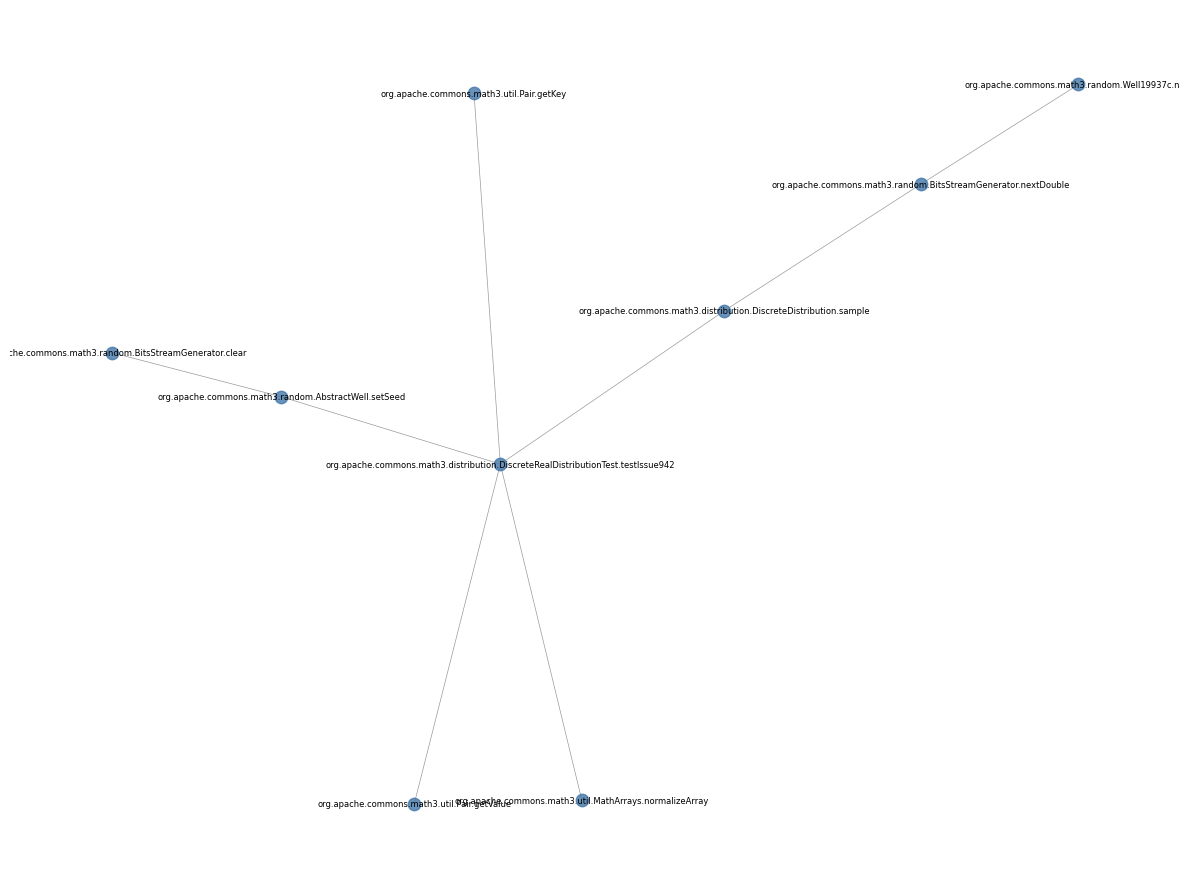

In [ ]:
import math
from pathlib import Path

import matplotlib.pyplot as plt
import networkx as nx
from SPARQLWrapper import SPARQLWrapper, JSON

# --- Config
ENDPOINT = "http://localhost:8890/sparql" # Local Virtuoso SPARQL endpoint
GRAPH_URI = "urn:graph:10e82e13-7116-42f7-bf5a-a9e8d0029ff5" # Example

# Use an f-string and escape literal braces with double braces
QUERY = f"""
PREFIX ex: <http://example.org/>

SELECT DISTINCT ?u ?v (1 AS ?w)
FROM <{GRAPH_URI}>
WHERE {{
    ?v_id ex:callee ?u_id .   # v calls u
    ?v_id ex:method ?v .
    ?u_id ex:method ?u .
    FILTER (?u != ?v)
}}
"""

# --- Fetch edges from SPARQL
sparql = SPARQLWrapper(ENDPOINT)
sparql.setQuery(QUERY)
sparql.setReturnFormat(JSON)
response = sparql.query().convert()
rows = response["results"]["bindings"]

# --- Build undirected graph
G = nx.Graph()
for row in rows:
    u = row["u"]["value"]
    v = row["v"]["value"]
    w = float(row["w"]["value"])
    G.add_edge(u, v, weight=w)

print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

# --- Layout and draw
plt.figure(figsize=(12, 9))
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_nodes(G, pos, node_size=80, node_color="#4477aa", alpha=0.8)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=6)

plt.axis("off")
plt.tight_layout()
plt.show()
